In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [3]:
train=pd.read_csv('data/train.csv')
val=pd.read_csv('data/val.csv')
test=pd.read_csv('data/test.csv')

In [4]:
train['Class'].value_counts(),val['Class'].value_counts(),test['Class'].value_counts()

(Class
 0    170579
 1       305
 Name: count, dtype: int64,
 Class
 0    56870
 1       90
 Name: count, dtype: int64,
 Class
 0    56863
 1       97
 Name: count, dtype: int64)

In [34]:
train.shape

(170884, 31)

In [35]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [36]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


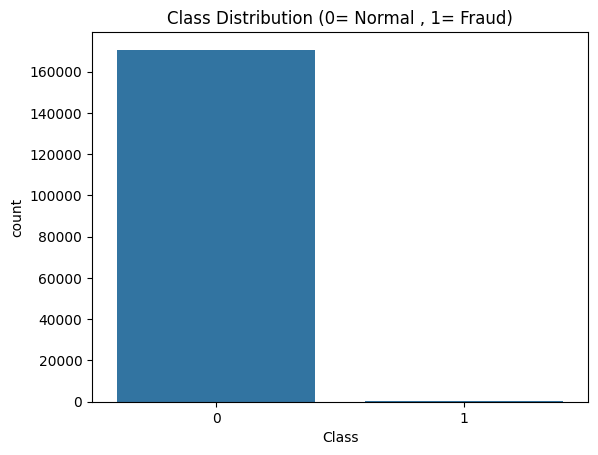

In [37]:
sns.countplot(x='Class',data=train)
plt.title('Class Distribution (0= Normal , 1= Fraud)')
plt.show()

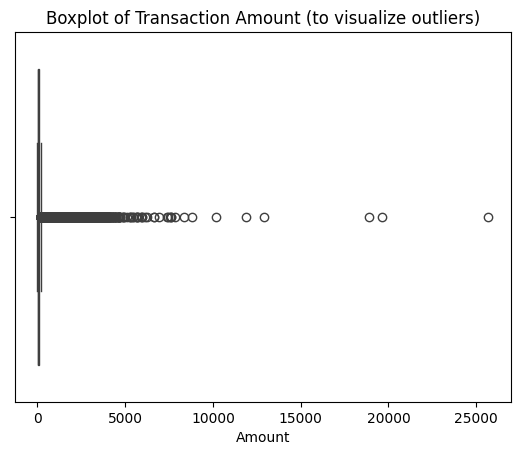

In [38]:
sns.boxplot(x=train['Amount'])
plt.title("Boxplot of Transaction Amount (to visualize outliers)")
plt.show()

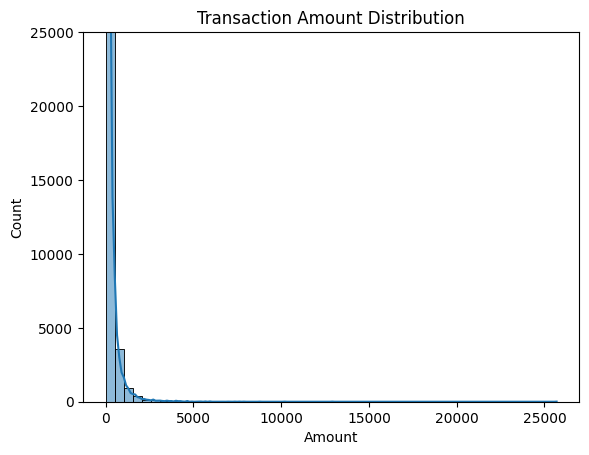

In [39]:
sns.histplot(train['Amount'],bins=50,kde=True)
plt.title("Transaction Amount Distribution")
plt.ylim(0,25000)
plt.show()

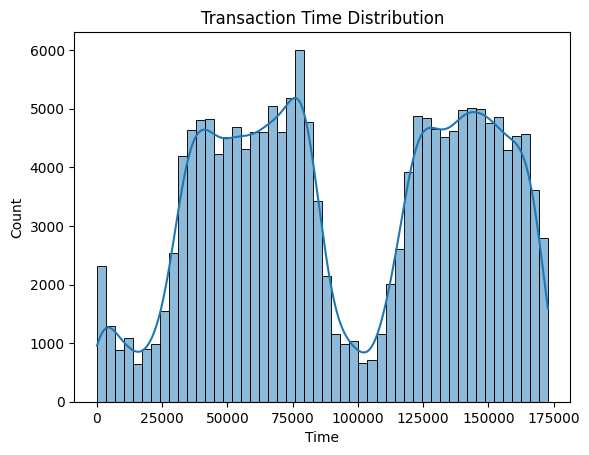

In [40]:
sns.histplot(train['Time'], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.show()

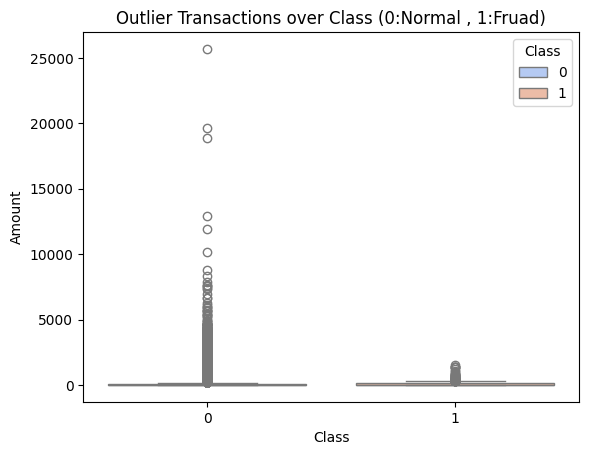

In [41]:
sns.boxplot(data=train, x='Class', y='Amount', hue='Class', palette='coolwarm')
plt.title("Outlier Transactions over Class (0:Normal , 1:Fruad)")
plt.show()

In [ ]:
y=train['Class']
train.drop(['Class'],axis=1,inplace=True)

stander=StandardScaler()
train_scaled=stander.fit_transform(train)

In [43]:
train=pd.DataFrame(train)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.510378,1.048270,-0.080178,-1.141990,0.198052,0.242338,-0.618467,0.266197,-0.185911,0.244246,...,-0.344386,-0.010047,0.166846,0.060032,-0.587633,0.284796,1.183029,-0.257906,-0.293297,-0.310753
1,-0.489125,0.623515,-0.095903,-0.290197,-0.064833,0.074819,-0.258957,0.136239,-0.076667,0.171336,...,-0.042053,-0.120612,-0.501887,-0.227707,-1.167344,0.798758,2.259630,-0.254453,-0.027805,-0.111249
2,1.201125,0.456316,-0.872350,-0.417408,2.764217,0.071113,1.817574,-0.244486,0.500994,-0.103063,...,0.656286,0.650579,0.670513,-0.198452,-0.988041,-1.139780,0.131984,-0.083626,0.120111,1.449496
3,-0.827082,-1.605437,1.362357,0.594105,0.105024,-1.513149,-0.111401,-1.216061,1.717531,0.455226,...,-0.123138,0.066683,-0.051020,0.171636,0.650669,0.583716,0.789428,-0.369295,0.236663,-0.326139
4,-0.596489,0.610569,-0.003993,0.199766,0.531457,-0.213500,-0.303823,0.048583,-0.122573,0.365519,...,0.016081,-0.317065,-0.750844,-0.144838,-0.104342,1.012995,0.612307,-0.065221,0.048306,-0.172168


## Clusters using Dimensionality Reduction

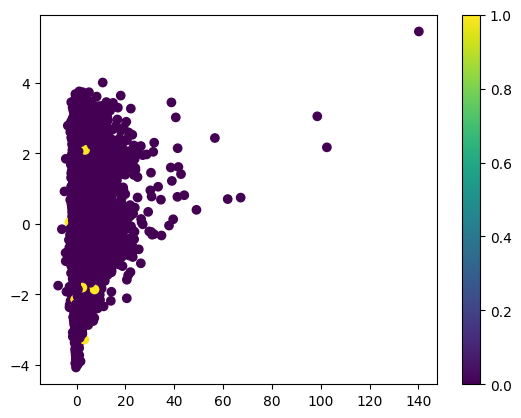

In [ ]:
# PCA scatter plot
pca=PCA(n_components=2)
train_pca=pca.fit_transform(train_scaled)
plt.scatter(train_pca[:,0],train_pca[:,1],c=y)
plt.colorbar()
plt.show()

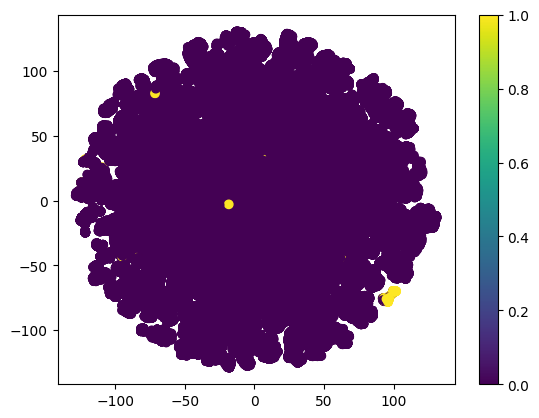

In [ ]:
# t-SNE scatter plot
tsne=TSNE(n_components=2)
train_tsne=tsne.fit_transform(train_scaled)
plt.scatter(train_tsne[:,0],train_tsne[:,1],c=y)
plt.colorbar()
plt.show()

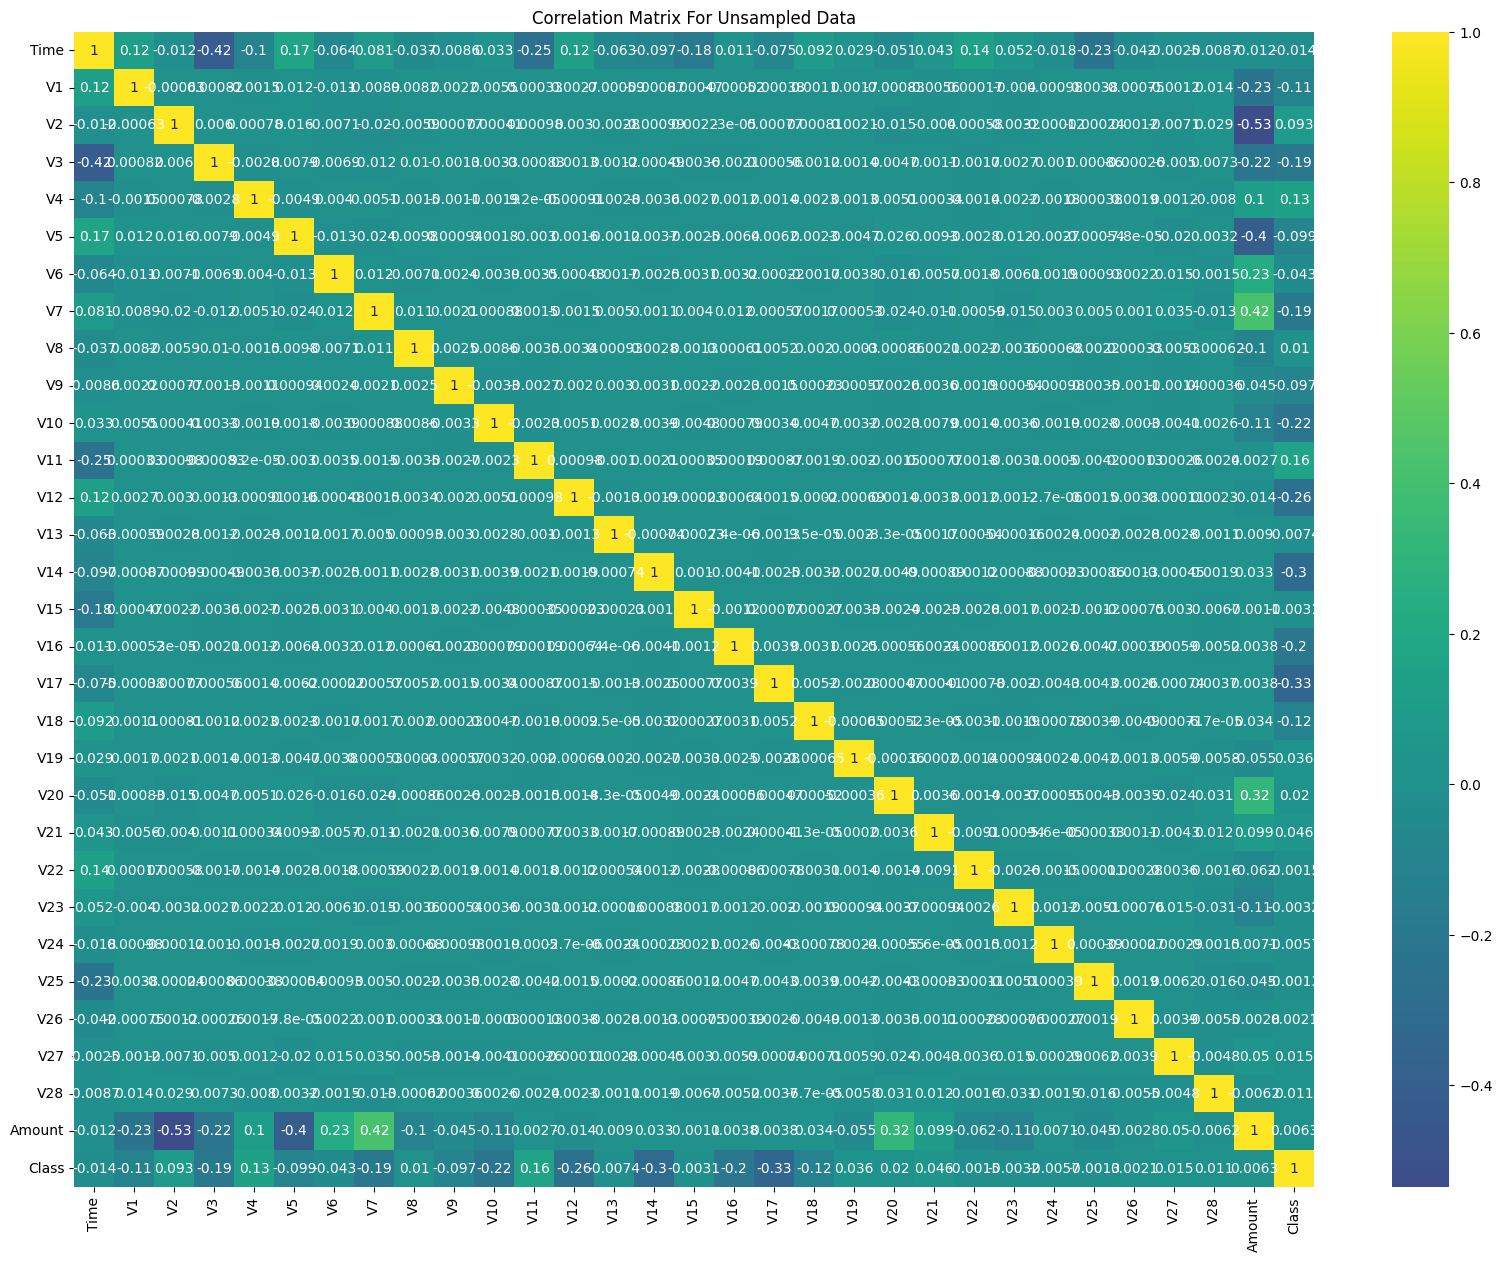

In [83]:
corr =train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix For Unsampled Data')
plt.show()

In [77]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

amount_fraud=train['Class'].value_counts()[1]

# Lets shuffle the data before creating the subsamples
train=train.sample(frac=1)

fraud_df=train.loc[train['Class']==1]
non_faurd_df=train.loc[train['Class']==0][:amount_fraud]

normal_df=pd.concat([fraud_df,non_faurd_df])

# Shuffle dataframe rows
# fraud_df = fraud_df.sample(frac=1, random_state=42)
# non_faurd_df = non_faurd_df.sample(frac=1, random_state=42)
new_df = normal_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67405,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
152848,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
46179,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
87326,48397.0,-0.468352,0.399958,1.295270,0.828682,2.222992,4.862288,0.508465,0.436521,-0.050101,...,-0.210169,-0.132082,-0.207599,0.992706,-0.097091,-0.175999,-0.603121,-0.619159,102.33,0
44332,142409.0,-1.172183,1.661713,-3.049637,2.555058,3.669035,-3.162998,-5.985640,-2.179935,-1.120292,...,-0.812098,-0.295361,-5.988806,0.714381,-1.600024,-0.634783,0.822713,0.494375,2.00,1


In [78]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89983,64093.0,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,-1.606743,...,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,294.90,1
56091,142840.0,-3.613850,-0.922136,-4.749887,3.373001,-0.545207,-1.171301,-4.172315,1.517016,-1.775833,...,0.786787,0.893065,1.034907,0.097671,-1.345551,-0.788329,1.055442,0.099971,144.80,1
90330,41170.0,-6.498086,4.750515,-8.966558,7.098854,-6.958376,-2.822126,-10.333406,4.031907,-6.648778,...,2.158143,0.111510,0.216414,0.584661,0.760360,0.081972,1.415068,0.035124,83.38,1
87515,48533.0,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1
126657,110087.0,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,0.508730,...,-0.173602,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1.00,1


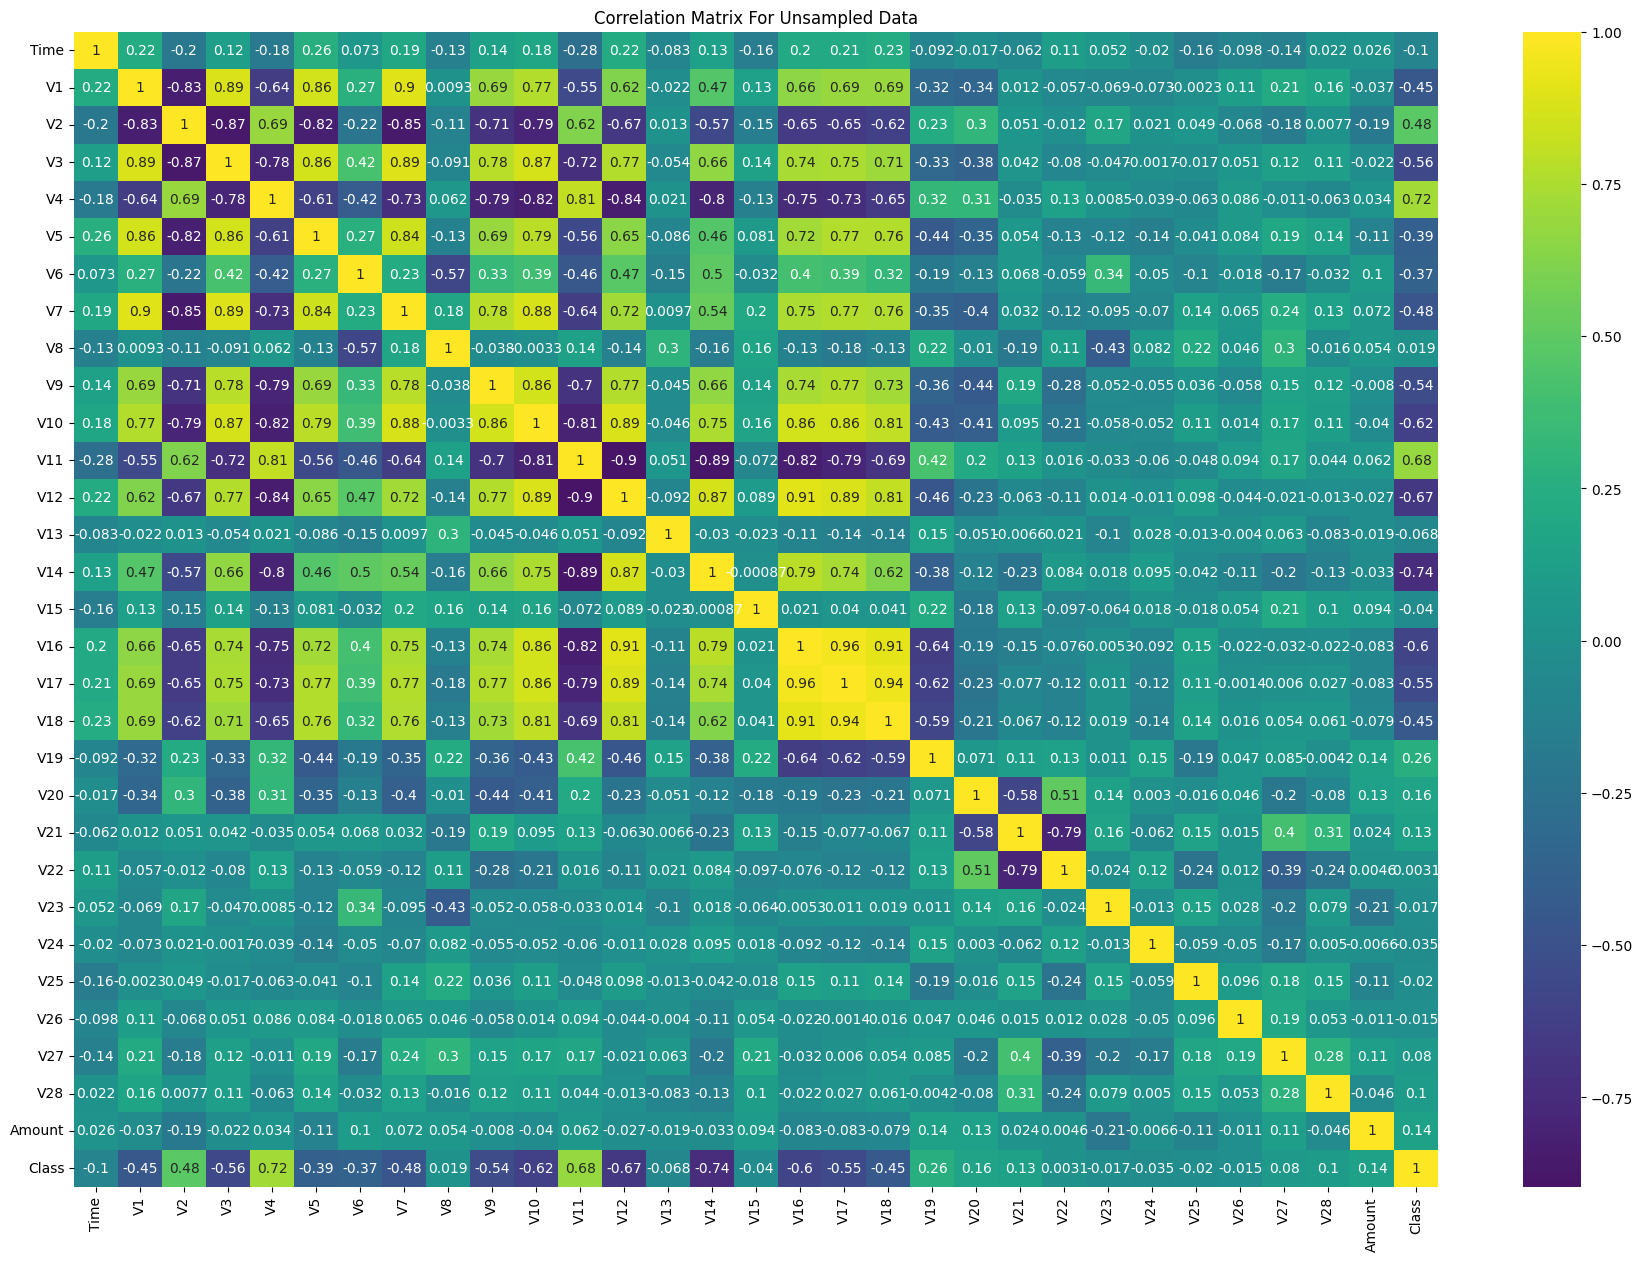

In [79]:
corr =new_df.corr()
plt.figure(figsize=(22,15))
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix For Unsampled Data')
plt.show()

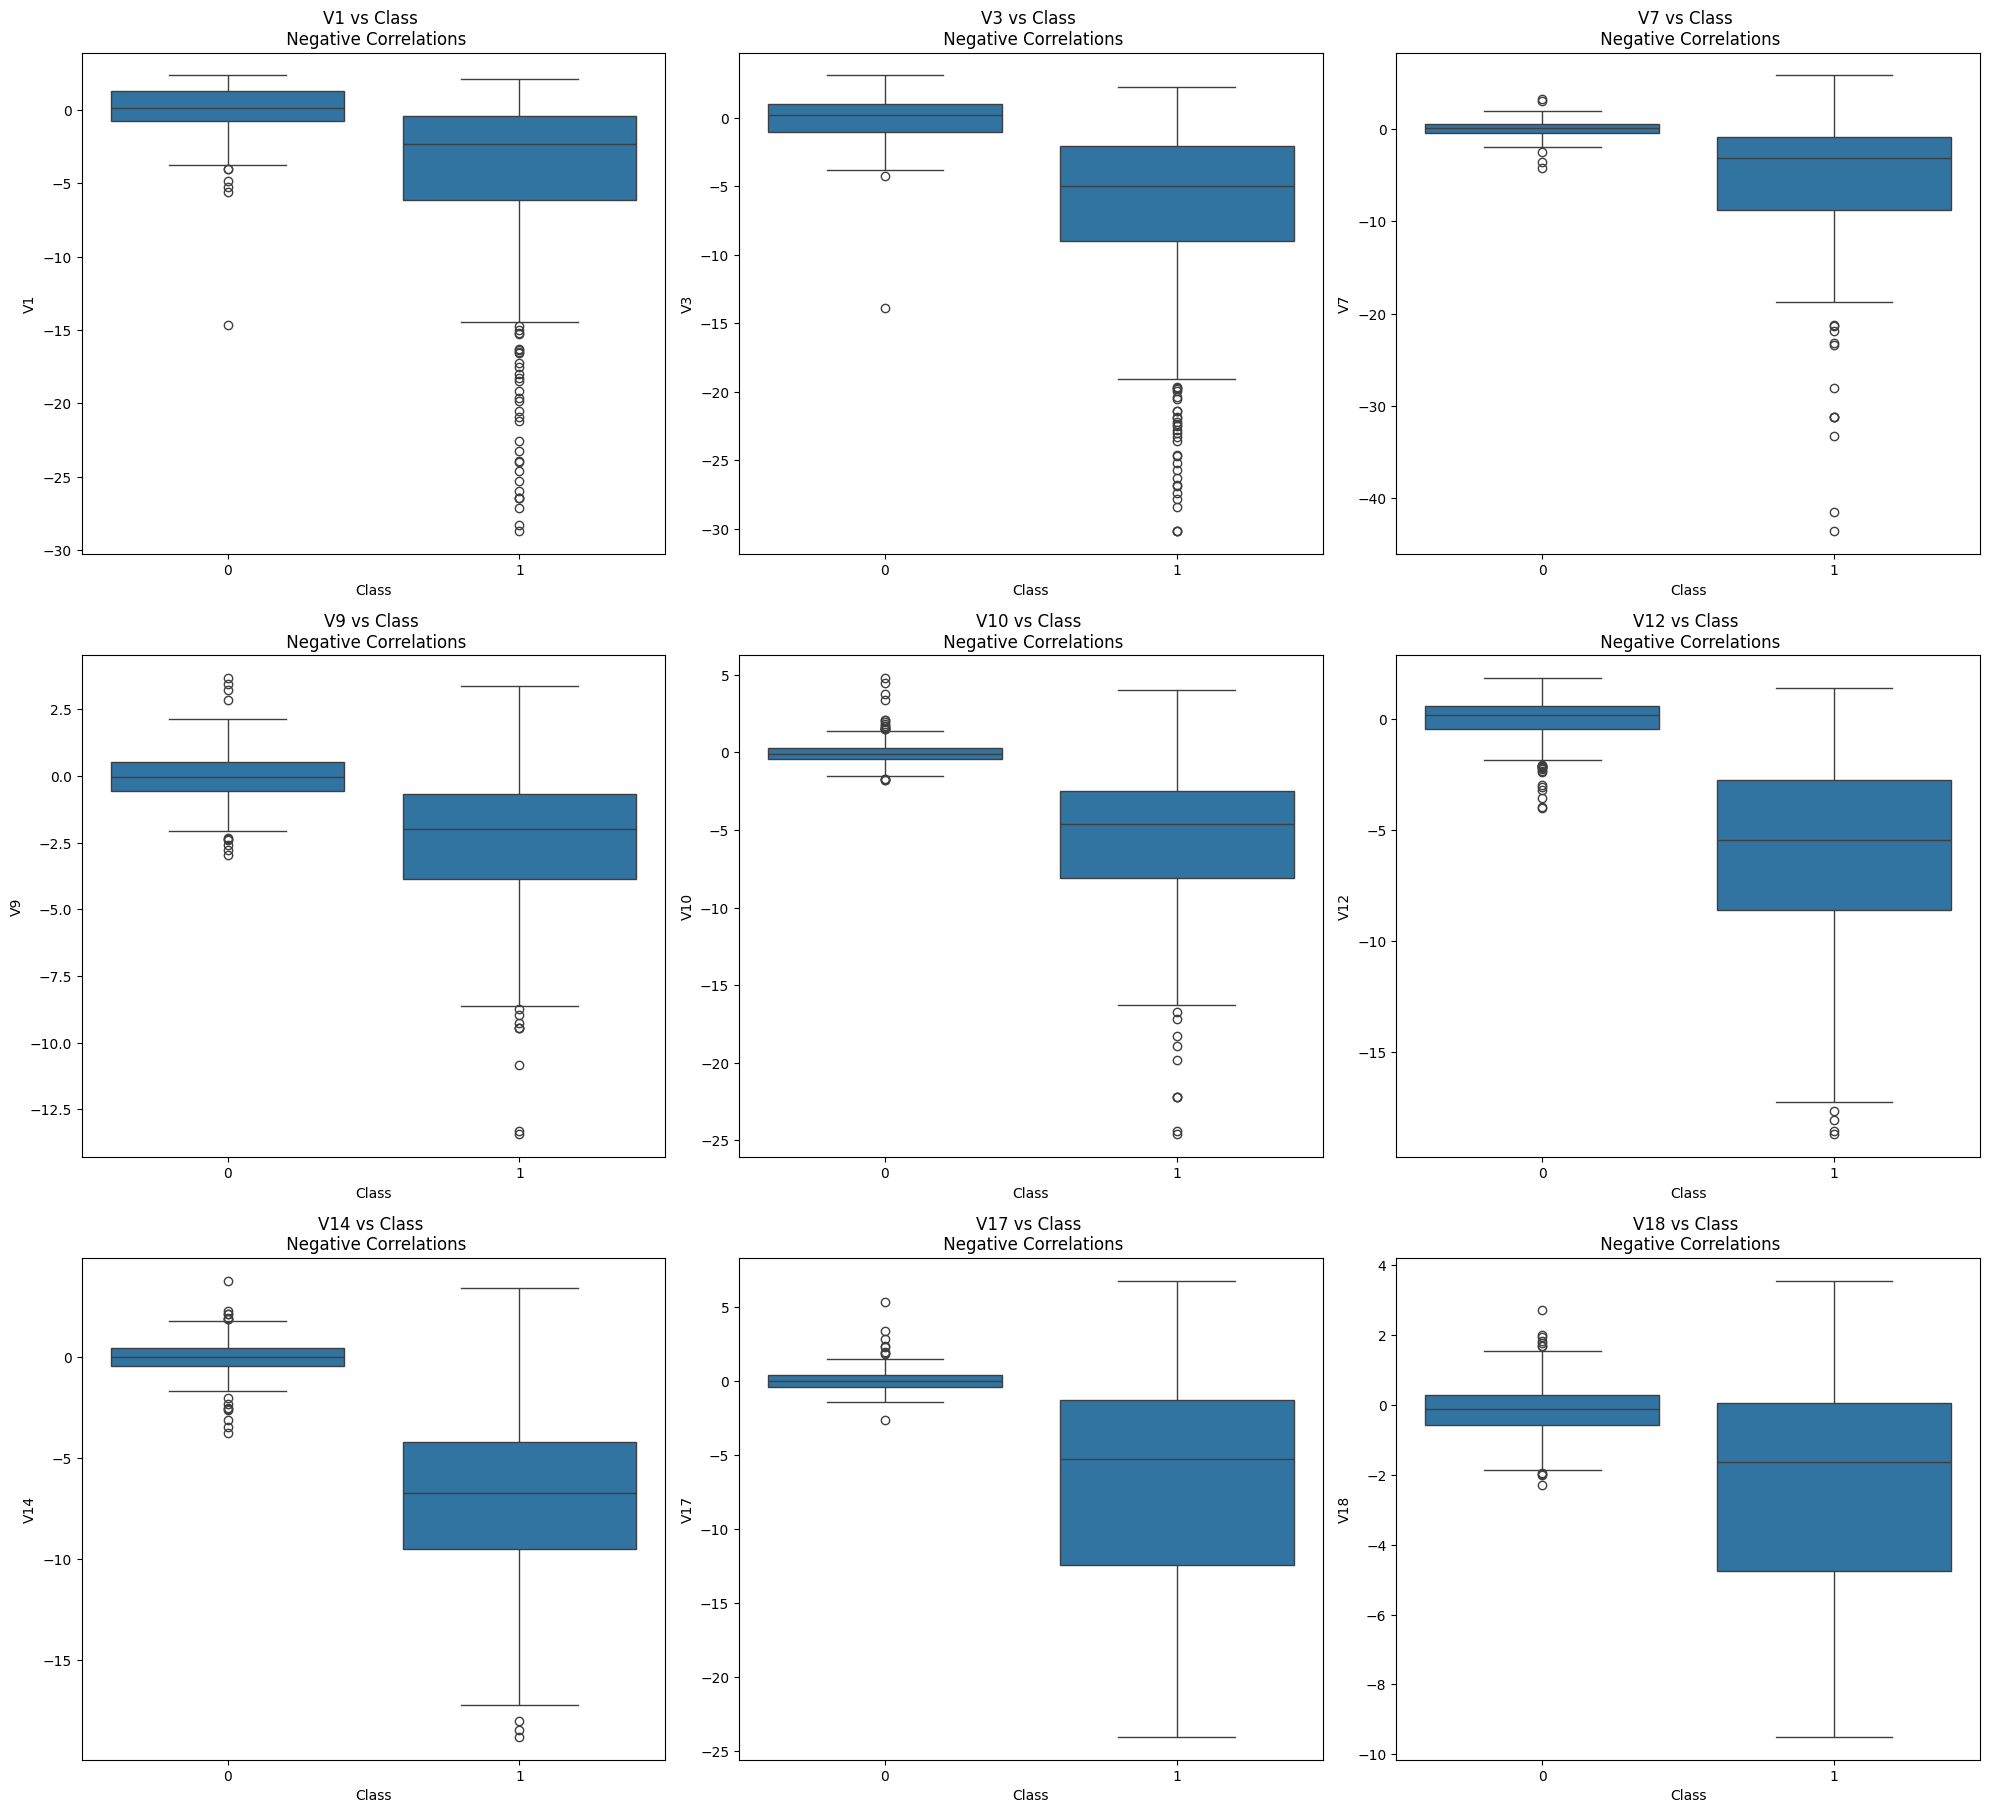

In [115]:
figure= plt.figure(figsize=(20,60))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

col=['V1','V3','V7','V9','V10','V12','V14','V17','V18']

for i in range(0,9):
    plt.subplot(10, 3, i + 1)
    sns.boxplot(data=new_df,x='Class',y=col[i])
    plt.title(f'{col[i]} vs Class \n Negative Correlations')
plt.tight_layout()

plt.show()


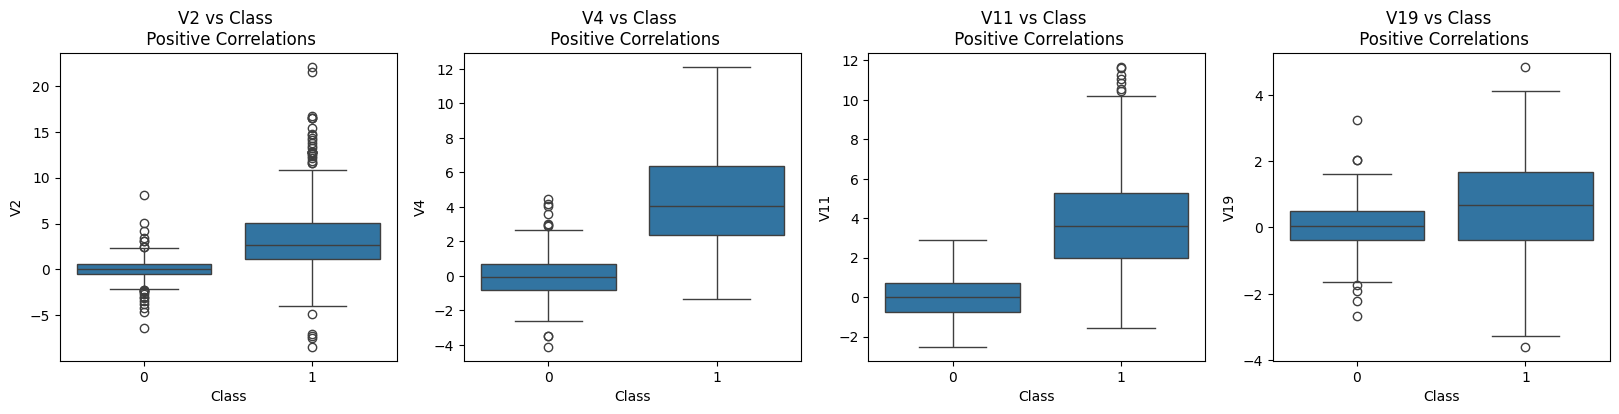

In [120]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

col=['V2','V4','V11','V19']


for i in range(0,4):
    sns.boxplot(data=new_df,x='Class',y=col[i],ax=axes[i])
    axes[i].set_title(f'{col[i]} vs Class \n Positive Correlations')

plt.show()

we will remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


But! We have to be careful as to how far do we want the threshold for removing outliers.

The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

C:\Users\Matrix Store\AppData\Local\Temp\ipykernel_22184\3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
C:\Users\Matrix Store\AppData\Local\Temp\ipykernel_22184\3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_f

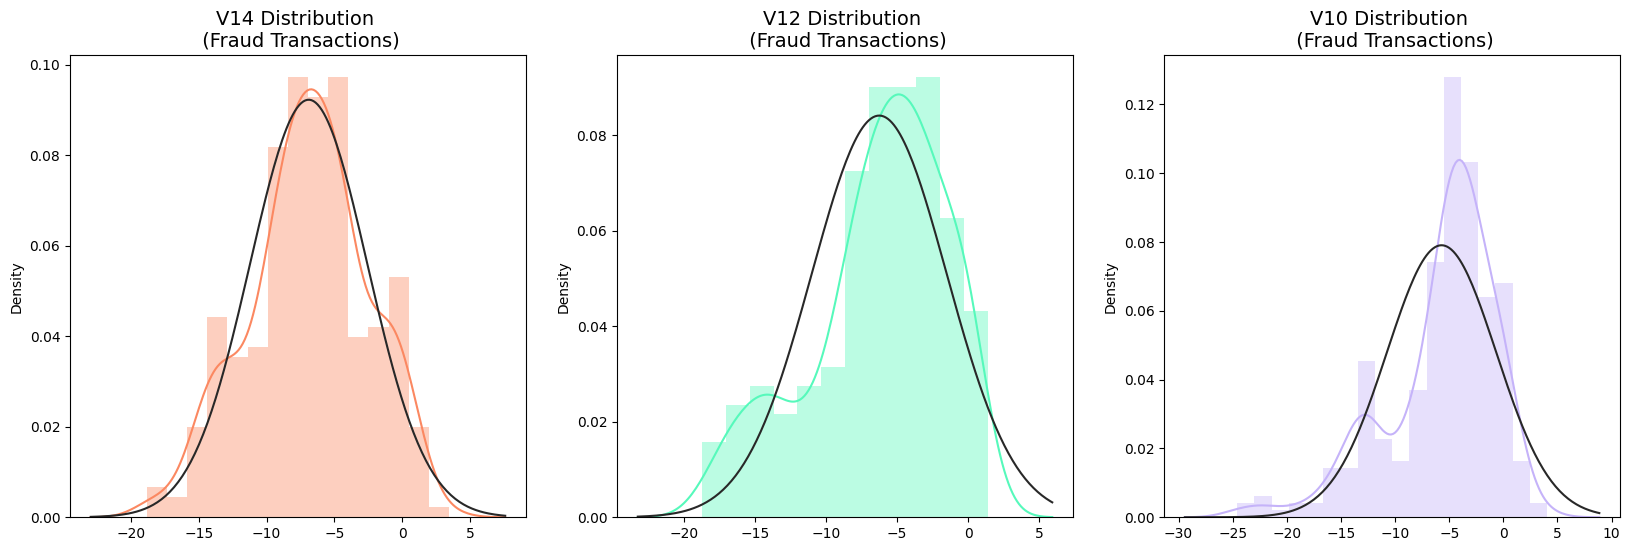

In [102]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [47]:
from typing import Counter


cnter=Counter(y)
minn=cnter[0]//2
minn

85289

In [48]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
randunder=RandomUnderSampler(sampling_strategy={0:minn},random_state=43)
smote=SMOTE(sampling_strategy={1:minn},k_neighbors=5,random_state=43)
pipli=Pipeline(steps=[('over',smote),('under',randunder)])
train,y=pipli.fit_resample(train,y)

In [49]:
yval=val['Class']
val.drop(columns=['Class'],axis=1,inplace=True)

yttest=test['Class']
test.drop(columns=['Class'],axis=1,inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.2,random_state=43,shuffle=True,stratify=y)


In [51]:
vtrain,vtest,yvtrain,yvtest=train_test_split(val,yval,test_size=0.2,random_state=43,shuffle=True,stratify=yval)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
model=LogisticRegression(solver='lbfgs')
model.fit(xtrain,ytrain)
ytestpred=model.predict(xtest)
ytrainpred=model.predict(xtrain)

reptra=classification_report(ytrain,ytrainpred)
reptes=classification_report(ytest,ytestpred)

print("training",reptra)

print("testing",reptes)



training               precision    recall  f1-score   support

           0       0.93      0.97      0.95     68231
           1       0.97      0.93      0.95     68231

    accuracy                           0.95    136462
   macro avg       0.95      0.95      0.95    136462
weighted avg       0.95      0.95      0.95    136462

testing               precision    recall  f1-score   support

           0       0.93      0.97      0.95     17058
           1       0.97      0.93      0.95     17058

    accuracy                           0.95     34116
   macro avg       0.95      0.95      0.95     34116
weighted avg       0.95      0.95      0.95     34116



In [53]:
yvpred=model.predict(val)
reptes=classification_report(yval,yvpred)

print("val",reptra)

val               precision    recall  f1-score   support

           0       0.93      0.97      0.95     68231
           1       0.97      0.93      0.95     68231

    accuracy                           0.95    136462
   macro avg       0.95      0.95      0.95    136462
weighted avg       0.95      0.95      0.95    136462



c:\Users\Matrix Store\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [54]:
ytpred=model.predict(test)
reptes=classification_report(yttest,ytpred)

print("test",reptra)

test               precision    recall  f1-score   support

           0       0.93      0.97      0.95     68231
           1       0.97      0.93      0.95     68231

    accuracy                           0.95    136462
   macro avg       0.95      0.95      0.95    136462
weighted avg       0.95      0.95      0.95    136462



c:\Users\Matrix Store\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
